# River Crossing: Transit time crossing a river
Kaela Nelson

Volume 4

Lab Objective: This lab discusses a classical calculus of variations problem: how is a river to be crossed in the shortest possible time? We will look at a numerical solution using the pseudospectral method. The mathematical details are found at: http://www.acme.byu.edu/wp-content/uploads/2018/02/18-River-Crossing.pdf .

In [33]:
import numpy as np
from scipy.integrate import quad
from scipy.optimize import root
import scipy as sp
from scipy import interpolate
from matplotlib import pyplot as plt

## Problem 1
Assume that the current is given by $C(x) = \frac{7}{10}(x^2 - 1).$ (This function assumes, for example, that the current is faster near the center of the river.) Write a Python function that accepts as arguments a function $y$, its derivitive $y^{'}$, and an $x$-value, and returns $L(x, y(x), y^{'}(x))$ (where $T[y] = \int_{-1}^1 L(x, y(x), y^{'}(x))$.) Use that function to define a second function that numerically computes $T[y]$ for a given path $y(x).$

In [34]:
def L(x, y, y_prime):
    alpha = (1-c(x)**2)**(-.5)
    return alpha*np.sqrt(1 + (alpha*y_prime(x))**2) - (alpha**2)*c(x)*y_prime(x)

def T(x, y, y_prime, a, b):
    new_L = lambda x: L(x, y, y_prime)
    return(sp.integrate.quad(new_L, a, b))

In [35]:
c = lambda x: (-.7)*(x**2 - 1)
x = np.linspace(-1, 1, 100)
y = lambda x: x
y_prime = lambda x:1
# Testing
L(x, y, y_prime)
T(x, y, y_prime, -1, 1)[0]

2.2591496762574677

## Problem 2
Let $y(x)$ be the straight-line path between $A = (-1, 0)$ and $B = (1, 5).$ Numerically calculate $T[y]$ to get an upper bound on the minimum time required to cross from A to B. Using (18.2), find a lower bound on the minimum time required to cross.

In [36]:
a = -1
b = 1
y = lambda x: (5/2.)*x + 5/2.
y_prime = lambda x: 5/2.
upper_bd = T(x, y, y_prime, a, b)[0]
print("Upper bound:", upper_bd)
print("Lower bound:", 2)

Upper bound: 3.8770820491384126
Lower bound: 2


## Problem 3
Numerically solve the Euler-Langrange equation 
(18.4), using $c(x) = -\frac{7}{10}(x^2 - 1)$ and $\alpha = (1 - c^2)^{-\frac{1}{2}},$ and $y(-1) = 0, y(1)=5.$

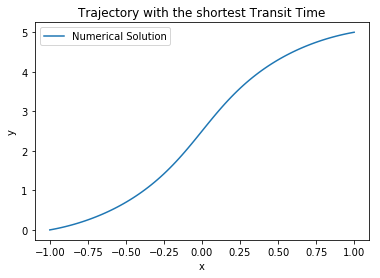

In [37]:
def cheb(N):
    x =  np.cos((np.pi/N)*np.linspace(0,N,N+1))
    x.shape = (N+1,1)
    lin = np.linspace(0,N,N+1)
    lin.shape = (N+1,1)
    c = np.ones((N+1,1))
    c[0], c[-1] = 2., 2.
    c = c*(-1.)**lin
    X = x*np.ones(N+1) # broadcast along 2nd dimension (columns)
    dX = X - X.T
    D = (c*(1./c).T)/(dX + np.eye(N+1))
    D  = D - np.diag(np.sum(D.T,axis=0))
    x.shape = (N+1,)
    # Here we return the differentiation matrix and the Chebyshev points,
    # numbered from x_0 = 1 to x_N = -1
    return D, x

def EL_equations(y):#x ,y_prime, D):       
    y_prime = D@y
    alpha = (1 - c(cheb_pts)**2)**(-.5)
    Ly_prime = (alpha**3)*y_prime*(1 + (alpha*y_prime)**2)**(-.5) - (alpha**2)*c(cheb_pts)
    out = D@Ly_prime
    out[0], out[-1] = y[0] - 5, y[-1]
    return out
    

D, cheb_pts = cheb(30)    
c = lambda x: (-.7)*(x**2 - 1)
y = lambda x: (5/2.)*x + 5/2.
guess = np.array([y(x) for x in cheb_pts])
solution = root(EL_equations, guess).x

approx_pts = scipy.interpolate.barycentric_interpolate(cheb_pts, solution, x)

plt.plot(x, approx_pts, label = "Numerical Solution")
plt.title("Trajectory with the shortest Transit Time")
plt.legend()
plt.ylabel("y")
plt.xlabel("x")
plt.show()

## Problem 4
Plot the angle at which the boat should be pointed at each $x$-coordinate.

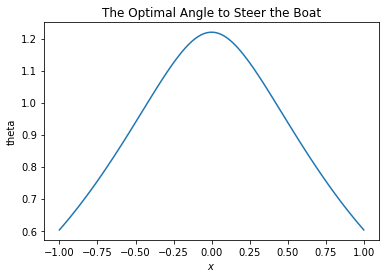

In [38]:
#change your y function to be that of the one in the lab
N = 30
D, cheb_pts = cheb(30) 
est_D = D@solution

def y_p(theta):
    D, x = cheb(N)
    out = est_D - (np.sin(theta) + c(cheb_pts))/np.cos(theta)
    return out

guess = np.ones_like(cheb_pts)
solution = root(y_p, guess).x
approx_pts = scipy.interpolate.barycentric_interpolate(cheb_pts, solution, x)

plt.plot(x, approx_pts)
plt.title("The Optimal Angle to Steer the Boat")
plt.xlabel("$x$")
plt.ylabel("theta")
plt.show()